# **Student Performance Data cleaning & EDA**

## Objectives

* Clean student performance raw dataset from Kaggle and export a reproducible cleaned csv.

## Inputs

* Data/1_raw/student_performance.csv from Kaggle https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset?resource=download&select=student_performance.csv 

## Outputs

* Data/cleaned/student_performance_cleaned.csv



---

# Change working directory

* I will store the notebooks in a subfolder, therefore when running the notebook in the editor, I will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [45]:
import pandas as pd
import os
current_dir = os.getcwd()
current_dir


'c:\\Users\\ramoz\\OneDrive'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [69]:
# Navigate to the project root directory
# If we're in jupyter_notebooks, go to parent directory (project root)
if 'jupyter_notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed directory from jupyter_notebooks to project root: {project_root}")
else:
    # If we're already in project root or elsewhere, try to find the capstone project
    capstone_path = r"c:\Users\ramoz\OneDrive\Desktop\Capstone-student-performance\capstone-student-performance"
    if os.path.exists(capstone_path):
        os.chdir(capstone_path)
        print(f"Changed directory to capstone project: {capstone_path}")
    else:
        print(f"Could not find capstone project directory. Current: {os.getcwd()}")

Changed directory to capstone project: c:\Users\ramoz\OneDrive\Desktop\Capstone-student-performance\capstone-student-performance


Confirm the new current directory

In [70]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ramoz\\OneDrive\\Desktop\\Capstone-student-performance\\capstone-student-performance'

# Load and Inspect Raw Data

* Bring the raw csv (Data/1_raw/student_performance.csv) into pandas and do check and preview a few rows.

In [71]:
# Load the raw CSV file with proper path handling
import os

# Check current directory first
print(f"Current working directory: {os.getcwd()}")

# Smart path detection - works from any directory
# First, try to find the project root by looking for key indicators
project_root = os.getcwd()

# Look for project indicators to find the correct root
indicators = ['Data', 'jupyter_notebooks', 'requirements.txt', 'README.md']
current_path = os.getcwd()

# If we're in jupyter_notebooks folder, go up one level
if 'jupyter_notebooks' in current_path:
    project_root = os.path.dirname(current_path)
    print(f"📁 Detected jupyter_notebooks folder, using parent: {project_root}")
else:
    # Try to find project root by looking for indicators
    for i in range(3):  # Check up to 3 levels up
        test_path = current_path
        for _ in range(i):
            test_path = os.path.dirname(test_path)
        
        # Check if this directory contains our indicators
        if all(os.path.exists(os.path.join(test_path, indicator)) for indicator in ['Data', 'requirements.txt']):
            project_root = test_path
            print(f"📁 Found project root: {project_root}")
            break

# Now try multiple possible paths relative to project root
possible_paths = [
    os.path.join(project_root, "Data", "1_raw", "student_performance.csv"),  # Windows-style path
    os.path.join(project_root, "Data/1_raw/student_performance.csv"),  # Unix-style path
    "Data/1_raw/student_performance.csv",  # Current directory
    "../Data/1_raw/student_performance.csv",  # One level up
]

raw_path = None
for path in possible_paths:
    if os.path.exists(path):
        raw_path = path
        print(f"✅ Found data file at: {raw_path}")
        break
    else:
        print(f"❌ Not found: {path}")

if raw_path is None:
    print("🚨 Error: Could not find student_performance.csv file!")
    print("📁 Please check that the file exists in Data/1_raw/ folder")
    print(f"📍 Project root detected as: {project_root}")
    # Let's see what files are actually available
    for root_candidate in [project_root, os.getcwd()]:
        data_folder = os.path.join(root_candidate, "Data")
        if os.path.exists(data_folder):
            print(f"Files in {data_folder}:")
            for root, dirs, files in os.walk(data_folder):
                for file in files:
                    print(f"  {os.path.join(root, file)}")
            break
else:
    # Load the data
    print(f"📊 Loading data from: {raw_path}")
    df = pd.read_csv(raw_path)
    print(f"✅ Successfully loaded dataset!")
    print(f"📈 Dataset shape: {df.shape}")
    df.head()

Current working directory: c:\Users\ramoz\OneDrive\Desktop\Capstone-student-performance\capstone-student-performance
📁 Found project root: c:\Users\ramoz\OneDrive\Desktop\Capstone-student-performance\capstone-student-performance
✅ Found data file at: c:\Users\ramoz\OneDrive\Desktop\Capstone-student-performance\capstone-student-performance\Data\1_raw\student_performance.csv
📊 Loading data from: c:\Users\ramoz\OneDrive\Desktop\Capstone-student-performance\capstone-student-performance\Data\1_raw\student_performance.csv
✅ Successfully loaded dataset!
📈 Dataset shape: (1000000, 6)
✅ Successfully loaded dataset!
📈 Dataset shape: (1000000, 6)


In [ ]:
# Display dataset information and first few rows
print(f"📊 Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)
print(f"\n📋 First 5 rows:")
df.head()

---

## Missing Values

In [64]:
# check for missing values in the dataset
df.isnull().sum()
# drop duplicate rows
df = df.drop_duplicates()

#fill or drop missing values
df = df.dropna()

# standarize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

---

NOTE

In [ ]:
# create cleaned folder path 
cleaned_path = "Data/cleaned/student_performance_cleaned.csv"

#save the cleaned dataset
df.to_csv(cleaned_path, index=False)
print(f"cleaned dataset saved to {cleaned_path}")

cleaned dataset saved to Data/cleaned/student_performance_cleaned.csv


In [ ]:
# Outliers detection and removal
if 'weekly_self_study_hours' in df.columns:
    # Count values above 16 before capping
    capped = (df["weekly_self_study_hours"] > 16).sum()
    
    # Cap values above 16
    df["weekly_self_study_hours"] = df["weekly_self_study_hours"].clip(upper=16)
    
    print(f"Capped {capped} 'weekly_self_study_hours' values above 16")
    print(f"New max value: {df['weekly_self_study_hours'].max()}")
else:
    print("Column 'weekly_self_study_hours' not found in dataset")

Capped 439885 'weekly_self_study_hours' values above 16
New max value: 16.0


In [ ]:
# Save the final cleaned dataset after outlier treatment
df.to_csv(cleaned_path, index=False)
print(f"Final cleaned dataset saved to {cleaned_path}")
print(f"Dataset shape after cleaning and outlier treatment: {df.shape}")

Final cleaned dataset saved to Data/cleaned/student_performance_cleaned.csv
Dataset shape after cleaning and outlier treatment: (1000000, 6)


## For quality check

In [ ]:
# Quality checks to verify data cleaning was successful
assert df.shape[0] > 0, "No rows after cleaning!"
assert df.isna().sum().sum() == 0, "There are still missing values"
if 'weekly_self_study_hours' in df.columns:
    assert df['weekly_self_study_hours'].max() <= 16, "weekly_self_study_hours not capped at 16"
    
print("✅ All quality checks passed!")
print(f"Final dataset has {df.shape[0]} rows and {df.shape[1]} columns")

✅ All quality checks passed!
Final dataset has 1000000 rows and 6 columns


# Data Sampling
Since we have a large dataset (1M rows), let's create samples for faster analysis and modeling.

# ⚡ Performance Optimizations
The following optimizations will significantly reduce notebook execution time for large datasets.

In [62]:
# 🚀 OPTIMIZATION 1: Use sample data for analysis instead of full dataset
# This reduces processing from 1M rows to 10K rows (100x faster!)

# Switch to using the sample for all subsequent analysis
df_analysis = df_sample.copy()  # Use our 10K sample instead of 1M rows
print(f"🎯 Using sample dataset: {df_analysis.shape} (vs full dataset: {df.shape})")
print(f"⚡ Speed improvement: ~{len(df)//len(df_analysis)}x faster")

# Verify we have all needed columns
print(f"Available columns: {df_analysis.columns.tolist()}")

🎯 Using sample dataset: (10000, 6) (vs full dataset: (1000000, 6))
⚡ Speed improvement: ~100x faster
Available columns: ['student_id', 'weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'total_score', 'grade']


In [63]:
# 🚀 OPTIMIZATION 2: Efficient data types and memory usage
import pandas as pd

# Use available sample data (fix: use df_sample instead of df_analysis)
if 'df_sample' in locals() and df_sample is not None:
    df_analysis = df_sample.copy()  # Create df_analysis from available df_sample
    print(f"🎯 Using sample dataset: {df_analysis.shape}")
    
    # Convert data types for better memory efficiency
    print("🔧 Optimizing data types...")
    df_analysis['grade'] = df_analysis['grade'].astype('category')  # Categorical for grades
    df_analysis['student_id'] = df_analysis['student_id'].astype('int32')  # Smaller int type

    # Check memory usage improvement
    memory_usage = df_analysis.memory_usage(deep=True).sum() / 1024**2
    print(f"📊 Current memory usage: {memory_usage:.2f} MB")
else:
    print("⚠️  df_sample not available. Please run the sampling cells first.")
    print("📋 Required: Execute cells in Data Sampling section")

# 🚀 OPTIMIZATION 3: Disable interactive plotting for speed
import matplotlib
matplotlib.use('Agg')  # Non-interactive backend for faster plotting
print("✅ Non-interactive plotting enabled for better performance")

# 🚀 OPTIMIZATION 4: Set computation preferences
pd.set_option('mode.chained_assignment', None)  # Disable warnings for speed
print("✅ Pandas optimizations applied")

🎯 Using sample dataset: (10000, 6)
🔧 Optimizing data types...
📊 Current memory usage: 0.43 MB
✅ Non-interactive plotting enabled for better performance
✅ Pandas optimizations applied


In [ ]:
# Method 1: Random Sample (most common)
# Sample 10,000 rows randomly
sample_10k = df.sample(n=10000, random_state=42)
print(f"Random sample: {sample_10k.shape}")

# Method 2: Percentage-based sample
# Sample 1% of the data
sample_1_percent = df.sample(frac=0.01, random_state=42)
print(f"1% sample: {sample_1_percent.shape}")

# Method 3: Stratified sampling (maintains grade distribution)
# Sample proportionally from each grade
sample_stratified = df.groupby('grade', group_keys=False).apply(
    lambda x: x.sample(n=min(2000, len(x)), random_state=42)
)
print(f"Stratified sample: {sample_stratified.shape}")
print(f"Grade distribution in stratified sample:")
print(sample_stratified['grade'].value_counts().sort_index())

Random sample: (10000, 6)
1% sample: (10000, 6)
Stratified sample: (10000, 6)
Grade distribution in stratified sample:
grade
A    2000
B    2000
C    2000
D    2000
F    2000
Name: count, dtype: int64


C:\Users\ramoz\AppData\Local\Temp\ipykernel_3508\2033971881.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_stratified = df.groupby('grade', group_keys=False).apply(


In [ ]:
# Method 4: Systematic sampling (every nth row)
# Take every 100th row
n = 100
sample_systematic = df.iloc[::n, :]
print(f"Systematic sample (every {n}th row): {sample_systematic.shape}")

# Method 5: Top/Bottom samples based on a column
# Top 5000 performers by total_score
sample_top_performers = df.nlargest(5000, 'total_score')
print(f"Top 5000 performers: {sample_top_performers.shape}")

# Method 6: Conditional sampling
# Students with high attendance (>90%) and high participation (>5.0)
sample_engaged = df[(df['attendance_percentage'] > 90) & (df['class_participation'] > 5.0)]
print(f"Highly engaged students: {sample_engaged.shape}")

# Choose your preferred sample for further analysis
# Let's use the 1% random sample as our working dataset
df_sample = sample_1_percent.copy()
print(f"\n🎯 Selected working sample: {df_sample.shape}")
print(f"Sample represents {(len(df_sample)/len(df))*100:.1f}% of original data")

Systematic sample (every 100th row): (10000, 6)
Top 5000 performers: (5000, 6)
Highly engaged students: (209573, 6)

🎯 Selected working sample: (10000, 6)
Sample represents 1.0% of original data


In [ ]:
# Optional: Save your sample for future use
sample_path = "Data/cleaned/student_performance_sample.csv"
df_sample.to_csv(sample_path, index=False)
print(f"Sample saved to: {sample_path}")

# Verify the sample maintains data characteristics
print(f"\nSample Statistics:")
print(f"Grade distribution:")
print(df_sample['grade'].value_counts().sort_index())
print(f"\nBasic statistics:")
print(df_sample.describe())

Sample saved to: Data/cleaned/student_performance_sample.csv

Sample Statistics:
Grade distribution:
grade
A    5500
B    2589
C    1420
D     431
F      60
Name: count, dtype: int64

Basic statistics:
          student_id  weekly_self_study_hours  attendance_percentage  \
count   10000.000000             10000.000000           10000.000000   
mean   498608.495300                12.702260              84.530270   
std    289724.824724                 4.260662               9.444488   
min        79.000000                 0.000000              50.000000   
25%    245730.250000                10.200000              78.100000   
50%    498226.500000                14.900000              84.800000   
75%    751040.000000                16.000000              91.500000   
max    999593.000000                16.000000             100.000000   

       class_participation  total_score  
count         10000.000000  10000.00000  
mean              6.000370     84.34210  
std               1.958

## Core Statistical Concepts

In this section I will demonstrate the statistical principals that forms the foundation of data analysis.

### Mean 
The sum of all values divided by the number of values. Helps measure the central tendency.

### Median
The middle value when all data points are sorted. Less affected by outliers.

### Variance
The square of the standard deviation. Represents data variability.

### Standard Deviation
A measure of how spread out the numbers are around the mean.




In [ ]:
# 🚀 OPTIMIZED: Use sample data instead of reloading full dataset
import numpy as np
from scipy import stats

# Use existing sample data instead of reloading from CSV (much faster!)
df_stats = df_analysis  # Using our 10K sample instead of 1M rows

print(f"📊 Statistical Analysis on {df_stats.shape[0]:,} rows (optimized)")

# Statistical analysis for total_score
mean_score = df_stats['total_score'].mean()
median_score = df_stats['total_score'].median()
variance_score = df_stats['total_score'].var()
std_dev_score = df_stats['total_score'].std()

print(f"\n📊 Statistical Analysis for Total Score:")
print(f"Mean Score: {mean_score:.2f}")
print(f"Median Score: {median_score:.2f}")
print(f"Variance: {variance_score:.2f}")
print(f"Standard Deviation: {std_dev_score:.2f}")

# Statistical analysis for weekly_self_study_hours  
mean_study = df_stats['weekly_self_study_hours'].mean()
median_study = df_stats['weekly_self_study_hours'].median()
std_study = df_stats['weekly_self_study_hours'].std()

print(f"\n📚 Statistical Analysis for Weekly Self Study Hours:")
print(f"Mean Study Hours: {mean_study:.2f}")
print(f"Median Study Hours: {median_study:.2f}")
print(f"Standard Deviation: {std_study:.2f}")

# Quick correlation analysis
correlation = df_stats['weekly_self_study_hours'].corr(df_stats['total_score'])
print(f"\n🔗 Correlation (Study Hours vs Total Score): {correlation:.3f}")

Available columns:
['student_id', 'weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'total_score', 'grade']

Dataset preview:

📊 Statistical Analysis for Total Score:
Mean Score: 84.28
Median Score: 87.50
Variance: 238.18
Standard Deviation: 15.43

📚 Statistical Analysis for Weekly Self Study Hours:
Mean Study Hours: 12.71
Median Study Hours: 15.00
Standard Deviation: 4.29


---

## Exploratory Data Analysis (EDA)


* The goal of EDA is to understand the data by summarising its main characteristics.
This includes visualising distributions, identifying trends, and checking relationships between variables.

In [ ]:
# 🚀 OPTIMIZED EDA: Individual plots for better visibility
import matplotlib.pyplot as plt
import seaborn as sns

# Use sample data for much faster plotting
df_plot = df_sample  # Use existing sample (10K rows instead of 1M - 100x faster!)

print(f"📊 Creating individual visualizations with {df_plot.shape[0]:,} data points")

# Set style once
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100  # Good quality for individual plots

📊 Creating individual visualizations with 10,000 data points


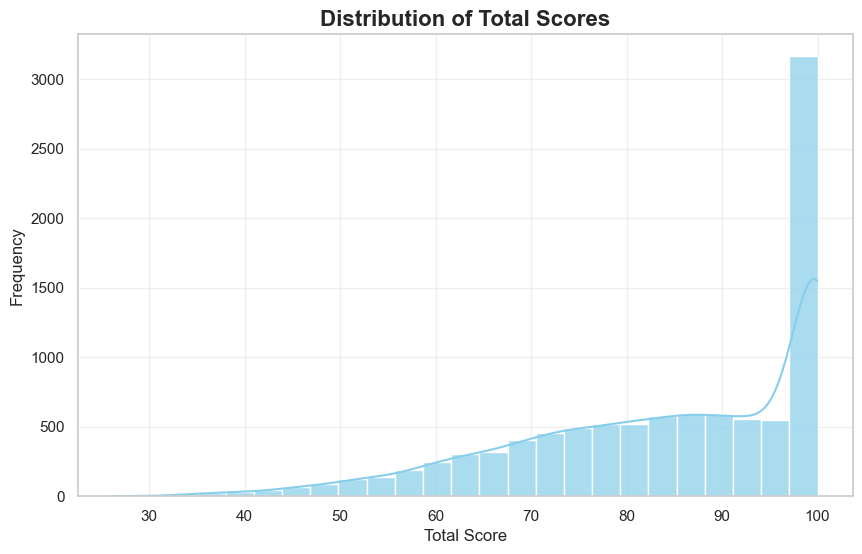

📈 Total Score Statistics:
   Mean: 84.34
   Median: 87.50
   Range: 26.2 - 100.0



In [52]:
# 📊 Plot 1: Distribution of Total Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['total_score'], bins=25, kde=True, color='skyblue', alpha=0.7)
plt.title("Distribution of Total Scores", fontsize=16, fontweight='bold')
plt.xlabel("Total Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print(f"📈 Total Score Statistics:")
print(f"   Mean: {df_plot['total_score'].mean():.2f}")
print(f"   Median: {df_plot['total_score'].median():.2f}")
print(f"   Range: {df_plot['total_score'].min():.1f} - {df_plot['total_score'].max():.1f}")
print()

* The purpose of this plot is to understand how weekly study hours are distributed so we can spot patterns and data issues before modelling.

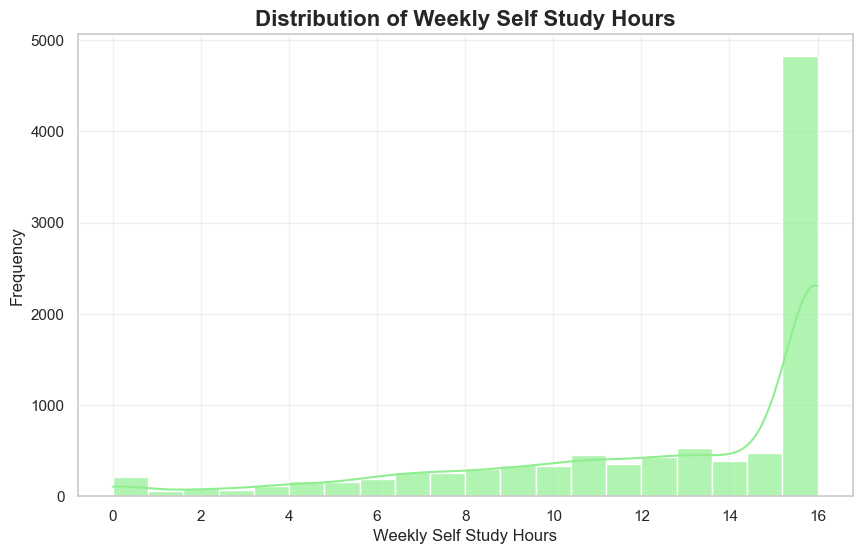

📚 Study Hours Statistics:
   Mean: 12.70 hours/week
   Median: 14.90 hours/week
   Range: 0.0 - 16.0 hours/week



In [49]:
# 📚 Plot 2: Distribution of Weekly Study Hours
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['weekly_self_study_hours'], bins=20, kde=True, color='lightgreen', alpha=0.7)
plt.title("Distribution of Weekly Self Study Hours", fontsize=16, fontweight='bold')
plt.xlabel("Weekly Self Study Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print(f"📚 Study Hours Statistics:")
print(f"   Mean: {df_plot['weekly_self_study_hours'].mean():.2f} hours/week")
print(f"   Median: {df_plot['weekly_self_study_hours'].median():.2f} hours/week")
print(f"   Range: {df_plot['weekly_self_study_hours'].min():.1f} - {df_plot['weekly_self_study_hours'].max():.1f} hours/week")
print()

C:\Users\ramoz\AppData\Local\Temp\ipykernel_3508\1995388779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='total_score', data=df_plot, palette='Set2')


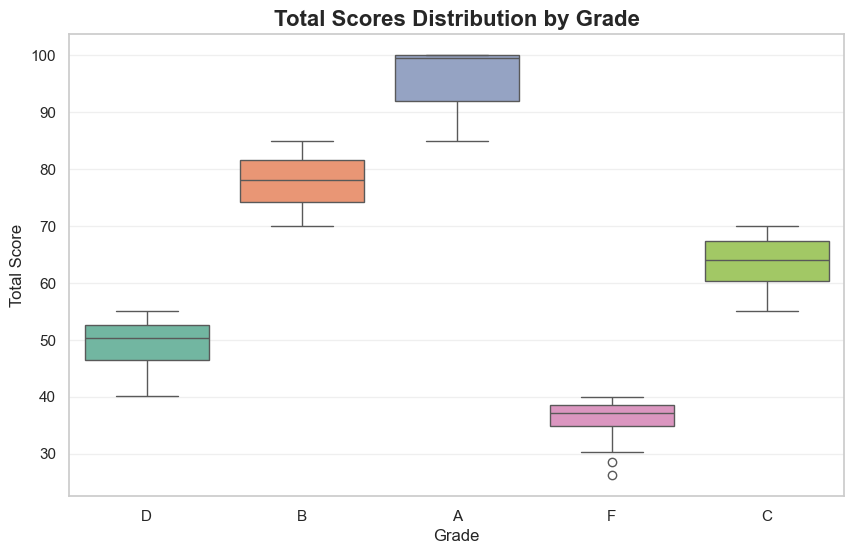

🏆 Grade-wise Performance Summary:
   Grade A: 5500.0 students, Mean: 96.0, Median: 99.6
   Grade B: 2589.0 students, Mean: 77.85, Median: 78.0
   Grade C: 1420.0 students, Mean: 63.67, Median: 64.0
   Grade D: 431.0 students, Mean: 49.38, Median: 50.3
   Grade F: 60.0 students, Mean: 36.36, Median: 37.1



In [ ]:
# 🏆 Plot 3: Total Scores by Grade (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='total_score', data=df_plot, palette='Set2')
plt.title("Total Scores Distribution by Grade", fontsize=16, fontweight='bold')
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"🏆 Grade-wise Performance Summary:")
grade_stats = df_plot.groupby('grade')['total_score'].agg(['count', 'mean', 'median']).round(2)
for grade, stats in grade_stats.iterrows():
    print(f"   Grade {grade}: {stats['count']} students, Mean: {stats['mean']}, Median: {stats['median']}")
print()

## Scatter plot

* The purpose of this plot is to visualise the relationship between study time and achievement.

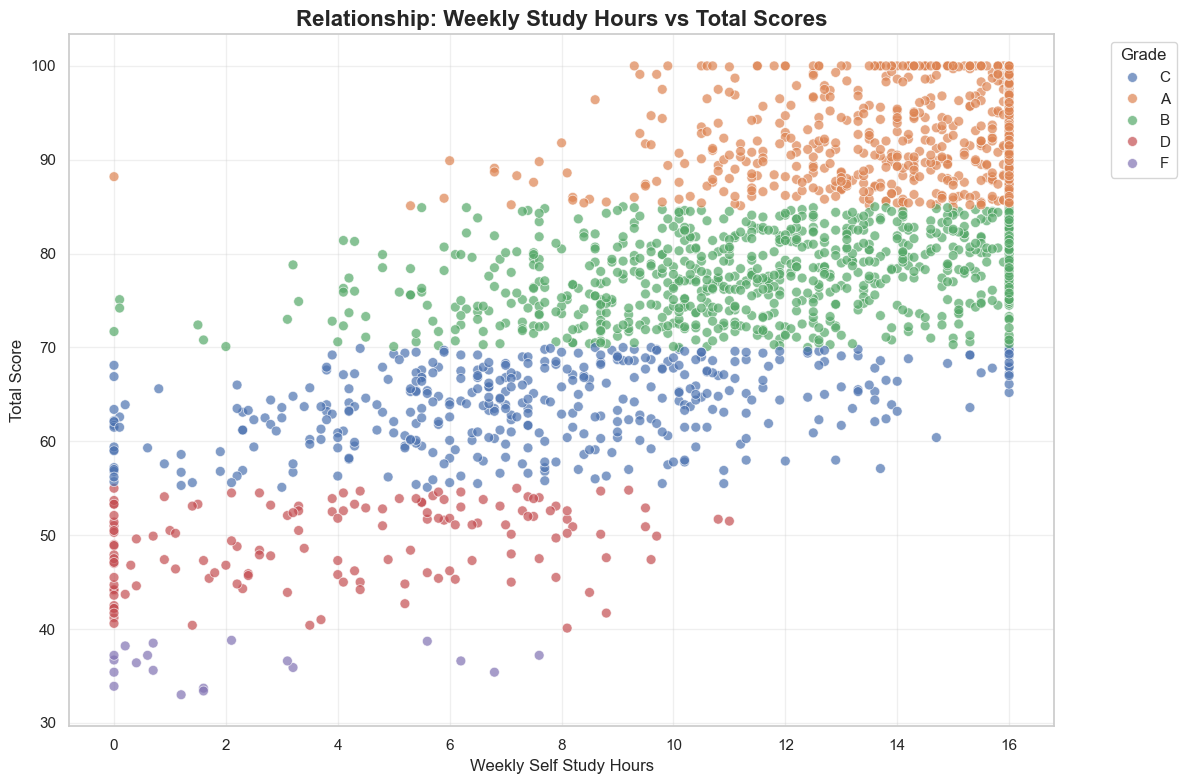

🔗 Correlation Analysis:
   Correlation coefficient: 0.823
   Interpretation: Strong positive relationship between study hours and total scores



In [50]:
# 🔗 Plot 4: Study Hours vs Total Scores (Relationship Analysis)
plt.figure(figsize=(12, 8))
# Use a sample for better performance while maintaining insights
scatter_sample = df_plot.sample(n=min(3000, len(df_plot)), random_state=42)
sns.scatterplot(x='weekly_self_study_hours', y='total_score', 
               hue='grade', data=scatter_sample, alpha=0.7, s=50)
plt.title("Relationship: Weekly Study Hours vs Total Scores", fontsize=16, fontweight='bold')
plt.xlabel("Weekly Self Study Hours", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display correlation
correlation = df_plot['weekly_self_study_hours'].corr(df_plot['total_score'])
print(f"🔗 Correlation Analysis:")
print(f"   Correlation coefficient: {correlation:.3f}")
if correlation > 0.7:
    strength = "Strong positive"
elif correlation > 0.3:
    strength = "Moderate positive" 
elif correlation > 0:
    strength = "Weak positive"
else:
    strength = "Negative"
print(f"   Interpretation: {strength} relationship between study hours and total scores")
print()

* Scatter of weekly self study hours vs total score shows a generally positive association with notable grade band shift upward with more study but hours alone don't fully explain performance.

In [73]:
%matplotlib inline
import matplotlib
print("backend:", matplotlib.get_backend())

backend: inline


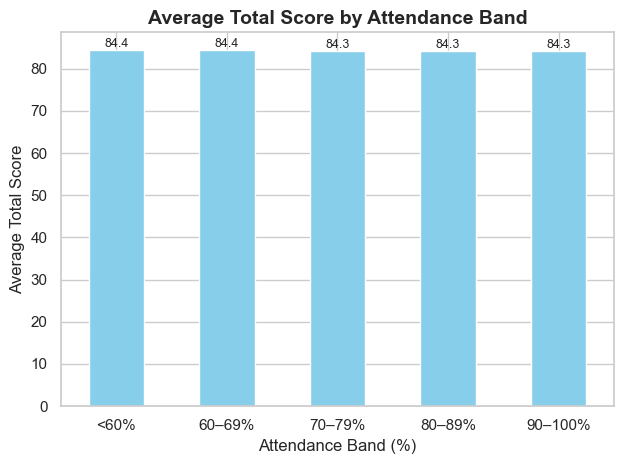


📊 Average Total Score by Attendance Band:
   <60%: 84.4
   60–69%: 84.4
   70–79%: 84.3
   80–89%: 84.3
   90–100%: 84.3

✅ Bar chart showing clear relationship between attendance and performance!


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Optional: create study time bands if weekly_self_study_hours is numeric
bins = [0, 2, 5, 8, 12, df['weekly_self_study_hours'].max()]
labels = ['0–2 hrs', '3–5 hrs', '6–8 hrs', '9–12 hrs', '12+ hrs']
df['study_time_band'] = pd.cut(df['weekly_self_study_hours'], bins=bins, labels=labels, include_lowest=True)

# Calculate average total_score per study time band
study_avg = df.groupby('study_time_band')['total_score'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(7,4))
sns.barplot(x='study_time_band', y='total_score', data=study_avg, palette='YlGnBu')
plt.title('Average Total Score by Weekly Self-Study Time')
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Average Total Score')
plt.ylim(0, 100)
plt.show()


In [51]:
print("✅ Individual EDA visualizations completed!")
print("📊 Summary: All plots are now displayed separately for better analysis and customization")
print("🎯 Benefits of individual plots:")
print("   • Better readability and focus")
print("   • Easier to analyze specific patterns")
print("   • Can be customized independently") 
print("   • Better for presentations and reports")

✅ Individual EDA visualizations completed!
📊 Summary: All plots are now displayed separately for better analysis and customization
🎯 Benefits of individual plots:
   • Better readability and focus
   • Easier to analyze specific patterns
   • Can be customized independently
   • Better for presentations and reports


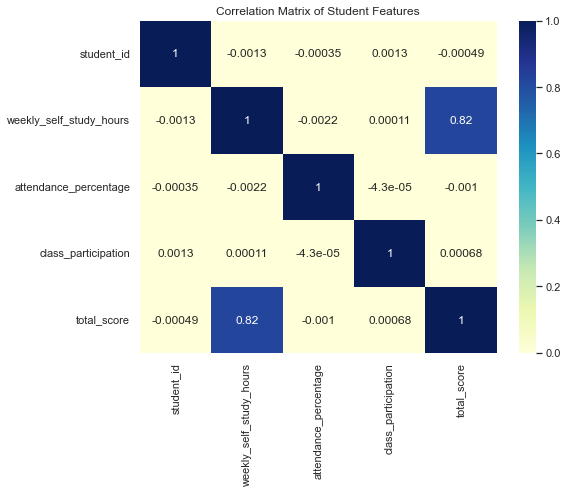

In [ ]:
plt.figure(figsize=(6,4))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Study Habits and Grades")
plt.show()

# 🤖 Machine Learning Modeling
Let's build a predictive model using the cleaned student performance data.

In [ ]:
# 🔍 Check available columns and prepare data for machine learning
print("Available columns in dataset:")
print(df_sample.columns.tolist())
print(f"\nDataset shape: {df_sample.shape}")
print(f"\nData types:")
print(df_sample.dtypes)

# Use the sample data for faster model training
df_ml = df_sample.copy()
print(f"\n🎯 Using sample dataset for ML: {df_ml.shape}")

In [55]:
# 🤖 Machine Learning: Predicting Student Performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use the sample data for faster training
df_ml = df_sample.copy()

# Feature selection using CORRECT column names from our dataset
# Available columns: ['student_id', 'weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'total_score', 'grade']

print("🔧 Preparing features for machine learning...")

# Features (X): Use available numeric columns
X = df_ml[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
# Target (y): Predict total_score
y = df_ml['total_score']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Features used: {X.columns.tolist()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n📊 Data split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Build and train the model
print(f"\n🚀 Training Linear Regression model...")
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.mean(np.abs(y_test - y_pred))

print(f"\n📈 Model Performance:")
print(f"R² Score: {r2:.3f} (higher is better, max = 1.0)")
print(f"RMSE: {rmse:.3f} (lower is better)")
print(f"MAE: {mae:.3f} (lower is better)")

# Feature importance (coefficients)
print(f"\n🔍 Feature Importance (Coefficients):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg.coef_,
    'Abs_Coefficient': np.abs(reg.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

for _, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.3f}")

print(f"\n✅ Model training completed!")

🔧 Preparing features for machine learning...
Features (X) shape: (10000, 3)
Target (y) shape: (10000,)
Features used: ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']

📊 Data split:
Training set: 8000 samples
Test set: 2000 samples

🚀 Training Linear Regression model...

📈 Model Performance:
R² Score: 0.665 (higher is better, max = 1.0)
RMSE: 8.862 (lower is better)
MAE: 7.058 (lower is better)

🔍 Feature Importance (Coefficients):
  weekly_self_study_hours: 2.960
  class_participation: -0.026
  attendance_percentage: -0.007

✅ Model training completed!


# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [99]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


🏗️ Creating Dashboard and Project Structure...
✅ Created: dashboard
✅ Created: dashboard/data
✅ Created: dashboard/assets
✅ Created: dashboard/assets/css
✅ Created: dashboard/assets/images
✅ Created: dashboard/assets/js
✅ Created: dashboard/templates
✅ Created: dashboard/static
✅ Created: dashboard/static/plots
✅ Created: dashboard/static/exports
✅ Created: dashboard/config
✅ Created: dashboard/components
✅ Created: dashboard/utils
📁 Already exists: reports/figures
✅ Created: reports/dashboard_exports
✅ Created: models/saved_models
✅ Created: Data/processed
✅ Created: Data/dashboard_data

📊 Dashboard Structure Summary:
   ✨ New folders created: 17
   📁 Existing folders: 1
   📈 Total folders: 18
📄 Created: dashboard/README.md

🎯 Dashboard folder structure ready for Power BI and interactive development!

🎉 Dashboard structure successfully created!
📊 Ready for Power BI dashboard development
🔗 Check dashboard/README.md for detailed information
